 
COVID Data Analysis
 


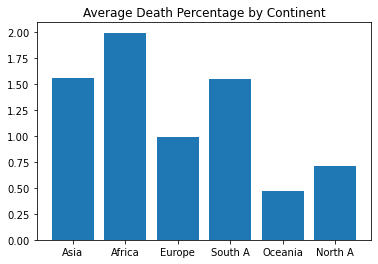

Africa has the highest average death per infection (death percentage) and Oceania has the lowest. South America data also includes The Caribbean.
 


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# COVID-19 Data Analysis
# Rini Christy's data found here (originally accessed 04/2022): https://www.kaggle.com/datasets/rinichristy/covid19-coronavirus-pandemic
# Analysis by Victoria Porter, written in Python 3.9

COVID_Dataset = pd.read_csv('C:/Users/Victoria/Documents/Python Practice/Datasets/COVID19_Coronavirus.csv', index_col = 0)

print(" ")
print("COVID Data Analysis")
print(" ")

# print(COVID_Dataset['Continent'].unique())

asia = COVID_Dataset[COVID_Dataset['Continent'] == 'Asia']
africa = COVID_Dataset[COVID_Dataset['Continent'] == 'Africa']
europe = COVID_Dataset[COVID_Dataset['Continent'] == 'Europe']
south_america = COVID_Dataset[COVID_Dataset['Continent'] == 'Latin America and the Caribbean']
oceania = COVID_Dataset[COVID_Dataset['Continent'] == 'Oceania']
north_america = COVID_Dataset[COVID_Dataset['Continent'] == 'Northern America']

asiaDPmean = asia['Death percentage'].mean()
africaDPmean = africa['Death percentage'].mean()
europeDPmean = europe['Death percentage'].mean()
saDPmean = south_america['Death percentage'].mean()
oceaniaDPmean = oceania['Death percentage'].mean()
naDPmean = north_america['Death percentage'].mean()

DP_bar = [asiaDPmean, africaDPmean, europeDPmean, saDPmean, oceaniaDPmean, naDPmean]
DP_bar_labels = ['Asia', 'Africa', 'Europe', 'South A', 'Oceania', 'North A']

plt.bar(DP_bar_labels, DP_bar)
plt.title('Average Death Percentage by Continent')
plt.show()
print("Africa has the highest average death per infection (death percentage) and Oceania has the lowest. South America data also includes The Caribbean.")
print(" ")

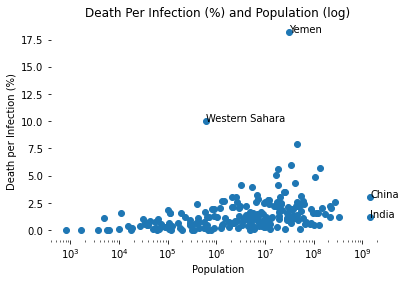

There exists a positive relationship between the increasing population of a country and an increased rate of death from infection (x scaled logarithmically for ease of interpretation). Two clear outliers exist, China and India, both of whom have the largest populations but, a death percentage of 2.997% and 1.212%, respectively. The countries with the largest death percentages, Yemen and The Western Sahara, had low to very low report rates, with only 10 cases reported in The Western Sahara.
 
Other names                     China
ISO 3166-1 alpha-3 CODE           CHN
Population                 1439323776
Continent                        Asia
Total Cases                    154738
Total Deaths                     4638
Tot Cases//1M pop                 108
Tot Deaths/1M pop                   3
Death percentage             2.997325
Name: China, dtype: object
 
Other names                     India
ISO 3166-1 alpha-3 CODE           IND
Population                 1403754381
Continent         

In [7]:
plt.scatter(COVID_Dataset['Population'], COVID_Dataset['Death percentage'])
plt.xscale('log')
plt.xlabel('Population')
plt.ylabel('Death per Infection (%)')
plt.title('Death Per Infection (%) and Population (log)')
plt.text(1439323776, 2.997325, "China")
plt.text(1403754381, 1.211712, "India")
plt.text(623031, 10.0, "Western Sahara")
plt.text(30975258, 18.151787, "Yemen")
plt.box(False)
plt.show()  
print("There exists a positive relationship between the increasing population of a country and an increased rate of death from infection (x scaled logarithmically for ease of interpretation). Two clear outliers exist, China and India, both of whom have the largest populations but, a death percentage of 2.997% and 1.212%, respectively. The countries with the largest death percentages, Yemen and The Western Sahara, had low to very low report rates, with only 10 cases reported in The Western Sahara.")

print(" ")
print(COVID_Dataset.loc['China'])
print(" ")
print(COVID_Dataset.loc['India'])
print(" ")
print(COVID_Dataset.loc['Western Sahara'])
print(" ")
print(COVID_Dataset.loc['Yemen'])
print(" ")

 
Population to Total Cases
 


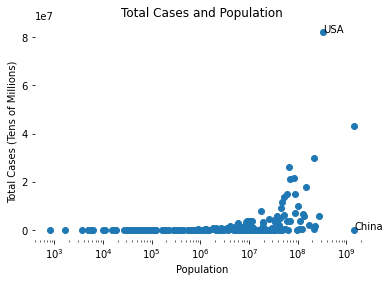

The relationship between population and total cases is positively correlated in countries with a population of approximately greater than one million people. A clear exception is China, who reported a very low number of cases, around 150,000, with a population of over a billion people. While this is, in part, due to not capturing all cases with reporting, China does have very strict lockdown measures and protocol, even building a temporary hospital in 10 days in Huoshenshan to manage overwhelm in healthcare in 2020. The USA has the most reported cases overall, with over 81 million people diagnosed so far. This can be attributed to bad pandemic policy by The Trump Administration at the beginning of the pandemic.
 
Other names                     China
ISO 3166-1 alpha-3 CODE           CHN
Population                 1439323776
Continent                        Asia
Total Cases                    154738
Total Deaths                     4638
Tot Cases//1M pop                 108
Tot Deaths/

In [8]:
print(" ")
print("Population to Total Cases")
print(" ")

plt.scatter(COVID_Dataset['Population'], COVID_Dataset['Total Cases'])
plt.xscale('log')
plt.xlabel('Population')
plt.ylabel('Total Cases (Tens of Millions)')
plt.title('Total Cases and Population')
plt.text(1439323776, 154738, "China")
plt.text(334400597, 81839052, "USA")
plt.box(False)
plt.show()  
print("The relationship between population and total cases is positively correlated in countries with a population of approximately greater than one million people. A clear exception is China, who reported a very low number of cases, around 150,000, with a population of over a billion people. While this is, in part, due to not capturing all cases with reporting, China does have very strict lockdown measures and protocol, even building a temporary hospital in 10 days in Huoshenshan to manage overwhelm in healthcare in 2020. The USA has the most reported cases overall, with over 81 million people diagnosed so far. This can be attributed to bad pandemic policy by The Trump Administration at the beginning of the pandemic.")
print(" ")
print(COVID_Dataset.loc['China'])
print(" ")
print(COVID_Dataset.loc['USA'])
print(" ")

In [4]:
print(" ")
print("Death Percentage below 1%")
print(" ")

low_dthpr = COVID_Dataset[COVID_Dataset['Death percentage'] < 1]
below1_first = low_dthpr.iloc[:, 4:6] # select columns 4 and 5
below1_second = low_dthpr.iloc[:, 8:9] # select column 8
below1 = below1_first.join(below1_second)
print(below1)
below1.to_csv('COVID_DP_below1.csv') # to file COVID_DP_below1.csv

 
Death Percentage below 1%
 
              Total Cases  Total Deaths  Death percentage
Country                                                  
Andorra             40024           153          0.382271
Anguilla             2700             9          0.333333
Aruba               34051           212          0.622596
Australia         4680816          6384          0.136386
Austria           3887355         15985          0.411205
...                   ...           ...               ...
Uruguay            889513          7166          0.805609
Uzbekistan         237853          1637          0.688240
Vanuatu              4107             2          0.048697
Vatican City           29             0          0.000000
Vietnam           9818328         42600          0.433882

[109 rows x 3 columns]


In [5]:
print(" ")
print("Population above 10,000 and Death Percentage above 4%")
print(" ")

pop_dp_bool = np.logical_and(COVID_Dataset['Population'] > 10000, COVID_Dataset['Death percentage'] > 4)
popten_dpfour = COVID_Dataset[pop_dp_bool] # create dataset from boolean list.
pop_first = popten_dpfour.iloc[:, 2:3] #select column 2
pop_second = popten_dpfour.iloc[:, 4:6] # select columns 4 and 5
pop_third = popten_dpfour.iloc[:, 8:9] # select column 8
pop_dp_temp = pop_first.join(pop_second) # join first and second columns
pop_dp4 = pop_dp_temp.join(pop_third) # join third column
print(pop_dp4)

 
Population above 10,000 and Death Percentage above 4%
 
                        Population  Total Cases  Total Deaths  \
Country                                                         
Afghanistan               40462186       177827          7671   
Bosnia and Herzegovina     3245097       375693         15719   
Ecuador                   18111933       859890         35421   
Egypt                    105711844       505264         24417   
Mexico                   131303955      5665376        323212   
Peru                      33775745      3548559        212328   
Somalia                   16668781        26400          1348   
Sudan                     45640385        61955          4907   
Syria                     18244381        55711          3144   
Western Sahara              623031           10             1   
Yemen                     30975258        11806          2143   

                        Death percentage  
Country                                   
Afghanista

## 